![imagelogo](Tinder-Logo.png)
# TinderProjekt Lorenz Faber | KI FTI2
## Was ist Tinder?

Tinder ist eine 2012 gegründete Online-Dating-App und eine der beliebtesten Apps der Welt. 
Sie wird in fast 200 Ländern angeboten und hat mehr als 6 Millionen zahlende Abonnenten.

Tinder ist dafür bekannt, dass es soziale Interaktionen im Zusammenhang mit der Partnersuche 
spielerisch gestaltet. Die Nutzer können auf den Profilen anderer Nutzer (mit Kurzbiografie 
und Fotos) anonym nach links oder rechts wischen, um ihr Interesse zu bekunden, wobei ein 
Wischen nach links Abneigung und ein Wischen nach rechts Gefallen bedeutet. Wenn zwei Nutzer 
einander nach "rechts" wischen ist es ein "Match" und die App verbindet die beiden Nutzer über 
einen gemeinsamen Chat.


## Ziel des Projekts
#### Korrelation herstellen zwischen der Anzahl an Matches/Dates an einer Universität und ob es in einer Beziehung endete.

## Aufgliederung der Aufgabenpakete
- Verständnis des Datensatzes
- wenn nötig Bereinigungen der Daten
- Darstellung in Tortendiagramm
- Aufspalten des Datensatzes und Filtern nach Features
- gegebenenfalls Parsen von Werten in Boolean oder Integer 
- Splitten in Trainings und Testdaten
- Anwendung des Modells KNearestNeighbors
- Anwendung des Modells RandomForestClassifier

### Tinder U: 
https://www.help.tinder.com/hc/de/articles/360015516052-Was-ist-Tinder-U-#:~:text=Tinder%20U%20ist%20ein%20neues,Kein%20Interesse%20zeigst.&text=Melde%20dich%20bei%20Tinder%20an,du%20auf%20dem%20Campus%20bist. 
#### Quelle Dataset:
https://www.kaggle.com/yamqwe/tinder-matches-rate

### Bedeutung der Features
Feature | Erläuterung
------- | ---------------- :
ID | eindeutige Identifizierung
Segment Type | mit welchem Medium nutzt man Tinder, oder nutzt man Tinder U
Segment Description | wie wurde befragt oder welcher Universität gehört man an (Tinder U)
Answer | Nutzt man Tinder?
Count | Anzahl an Matches
Percentage | %-Wert der Matches im Vergleich zu der Anzahl an Swipes
It became a relationship | Half die App der Person eine Beziehung zu finden?

In [3]:
# Import der Daten

In [7]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #wird für Tortendiagramm verwendet
df = pd.read_csv('Tinder Millennial Match Rate Dataset.csv')
df

ModuleNotFoundError: No module named 'numpy'

In [3]:
df.describe() # Beschreibung der Daten 

,ID,Count,Percentage
count,453.000000,453.000000,453.000000
mean,293333.000000,22.373068,0.331141
std,261.828188,136.996075,0.316157
min,292881.000000,0.000000,0.000000
25%,293107.000000,0.000000,0.000000
50%,293333.000000,1.000000,0.250000
75%,293559.000000,4.000000,0.500000
max,293785.000000,1969.000000,1.000000


In [4]:
#der Durchschnitt bei Count ist 22, jedoch sind 75% der Werte ~4 heißt es gibt sehr viele die eine sehr niedrige Anzahl an matches haben. Und sehr wenige, die extrem viele Matches haben (max)

In [5]:
df.info() #Anzeigen der Datentypen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        453 non-null    int64  
 1   Segment Type              453 non-null    object 
 2   Segment Description       453 non-null    object 
 3   Answer                    453 non-null    object 
 4   Count                     453 non-null    int64  
 5   Percentage                453 non-null    float64
 6   It became a Relationship  453 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.9+ KB


In [6]:
#Filtern um einzelne Tabellen mit Yes, No, I don't use Tinder zu unterteilen.

In [7]:
dfYes = df[df['Answer'] == 'Yes'] 

In [8]:
dfYes

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
9,292899,Gender,Female respondents,Yes,325,0.198,No
12,292905,University,Chapman University,Yes,13,0.206,No
...,...,...,...,...,...,...,...
438,293757,University,Penn State University,Yes,4,0.400,No
441,293763,University,Minnesota State University Mankato,Yes,1,1.000,No
444,293769,University,University of Florida,Yes,0,0.000,Yes
447,293775,University,Boston College,Yes,0,0.000,No


In [9]:
dfNo = df[df['Answer'] == 'No']

In [10]:
dfNo

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
4,292889,Web,Web-based respondents,No,0,0.000,No
7,292895,Gender,Male respondents,No,1172,0.528,No
10,292901,Gender,Female respondents,No,797,0.487,Yes
13,292907,University,Chapman University,No,31,0.492,No
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [11]:
dfDontUse = pd.concat([df, dfYes, dfNo]).drop_duplicates(keep=False)

In [12]:
dfDontUse

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
5,292891,Web,Web-based respondents,I don't use Tinder,0,0.000,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No
14,292909,University,Chapman University,I don't use Tinder,19,0.302,Yes
...,...,...,...,...,...,...,...
440,293761,University,Penn State University,I don't use Tinder,1,0.100,Yes
443,293767,University,Minnesota State University Mankato,I don't use Tinder,0,0.000,No
446,293773,University,University of Florida,I don't use Tinder,0,0.000,No
449,293779,University,Boston College,I don't use Tinder,1,0.200,No


In [13]:
# Tortendiagramm Nutzung der App

In [14]:
# Vorbereitung des Tortendiagramms

In [15]:
Total_Count = [dfYes['Count'].sum(), dfNo['Count'].sum(), dfDontUse['Count'].sum()]
print(Total_Count)

[2128, 5227, 2780]


In [16]:
# Tortendiagramm "ploten" - anzeigen

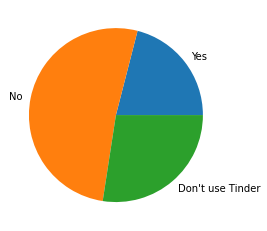

In [17]:
mylabels = ["Yes" , "No", "Don't use Tinder"]

plt.pie(Total_Count, labels = mylabels)
plt.show()

In [18]:
#alle eindeutigen Werte zu den Spalten anzeigen
cat_col = ['Segment Type', 'Segment Description', 'Answer', 'It became a Relationship']
for col in cat_col:
    print('Unique values in "{}" column count: {}'.format(col, df[col].nunique()))
    print(df[col].unique())
    print('-'*30)

Unique values in "Segment Type" column count: 4
['Mobile' 'Web' 'Gender' 'University']
------------------------------
Unique values in "Segment Description" column count: 151
['Mobile respondents' 'Web-based respondents' 'Male respondents'
 'Female respondents' 'Chapman University' 'Cornell University'
 'Duke University' 'George Washington University' 'Georgetown University'
 'Harvard University' 'Indiana University' 'Johns Hopkins University'
 'Northwestern University' 'Ohio State University' 'Princeton University'
 'San Diego State University' 'Santa Clara University'
 'Southern Methodist University' 'Stanford University' 'Tulane University'
 'University of Pennsylvania' 'University of Wisconsin-Madison'
 'University of Alabama' 'University of California, Berkeley'
 'University of California, Davis' 'University of California, Los Angeles'
 'University of California, Santa Barbara'
 'University of Colorado Boulder' 'University of Miami'
 'University of Michigan' 'University of Oregon'

In [19]:
#Segment Type sagt aus, ob Tinder über die App(mobil), über das Web, oder über das Universätetenportal(Tinder U) genutzt wird, was man mit Gender über die Geschlechter aussagt, kann ich nicht wirklich deuten
#Segment Description zeigt die verschiedenen Universitäten auf
#Answer sagt ob die Person jemals jemanden getroffen hat mit Tinder oder ob sie die app nicht verwenden
#It became a Relationship sagt aus, ob eine Beziehung entstand.

In [20]:
#Nun wird nur Yes und No zusammengefügt, da nur die Korrelation zwischen ob man sich jemals mit einem über Tinder getroffen hat & ob es zu einer Beziehung kam betrachtet wird.
# leute die überhaupt kein tinder nutzen werden erstmal außenvor gelassen.

In [21]:
frames = [dfYes, dfNo]

In [22]:
result = pd.concat(frames) #Zusammenfügen der zwei Dataframes dfYes und dfNo

In [23]:
result

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
9,292899,Gender,Female respondents,Yes,325,0.198,No
12,292905,University,Chapman University,Yes,13,0.206,No
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [24]:
#der weitere Fokus liegt auf den Universitäten, die Tinder U verwenden, deswegen werden Sie im folgenden herausgefiltert und in dfUniversity gespeichert.

In [25]:
dfUniversity = result[result['Segment Type'] == 'University'] #filtern nur nach Universitäten
dfUniversity

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
12,292905,University,Chapman University,Yes,13,0.206,No
15,292911,University,Cornell University,Yes,47,0.244,No
18,292917,University,Duke University,Yes,0,0.000,No
21,292923,University,George Washington University,Yes,1,0.250,No
24,292929,University,Georgetown University,Yes,2,0.500,Yes
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [26]:
#kopieren des Dataframes, um in der Kopie die Werte zu parsen  

In [27]:
dfUniversitybool = dfUniversity

In [28]:
# da "it became a Relationship" nur "Yes" oder "No" enthält, macht es Sinn diese Werte in 0 oder 1 umzuwandeln um mit KNN arbeiten zu können:

dict = {'Yes' :1, 'No' :0} #Übersetzung was 1 ,was 0 sein soll
dfUniversitybool['It became a Relationship'] = dfUniversitybool['It became a Relationship'].map(dict) 
dfUniversitybool['It became a Relationship'] = dfUniversitybool['It became a Relationship'].astype(int(bool)) # datentyp zu bool ändern

<ipython-input-28-b8c736d0fb57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUniversitybool['It became a Relationship'] = dfUniversitybool['It became a Relationship'].map(dict)


TypeError: int() argument must be a string, a bytes-like object or a number, not 'type'

In [29]:
# Die Syntaxwarning kann ich mir nicht erklären, da der parse funktioniert. Auch wenn die Slices mit .loc neu indexiert werden macht dies keinen Unterschied.

In [30]:
dfUniversitybool #result zeigt, dass It became a Relationship zu int-werten geändert wurde.

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
12,292905,University,Chapman University,Yes,13,0.206,0
15,292911,University,Cornell University,Yes,47,0.244,0
18,292917,University,Duke University,Yes,0,0.000,0
21,292923,University,George Washington University,Yes,1,0.250,0
24,292929,University,Georgetown University,Yes,2,0.500,1
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,0
442,293765,University,Minnesota State University Mankato,No,0,0.000,0
445,293771,University,University of Florida,No,1,1.000,0
448,293777,University,Boston College,No,4,0.800,1


In [31]:
#dfUniversitybool.sort_values('Segment Description') # sortieren nach Namen der Uni --> wird aktuell nicht benötigt.

In [32]:
from sklearn.model_selection import train_test_split #Importieren der Split-Funktion

In [33]:
y = dfUniversitybool['It became a Relationship'] #definieren von y

In [34]:
X = dfUniversitybool['Count'] #definieren von X

In [35]:
y

12     0
15     0
18     0
21     0
24     1
      ..
439    0
442    0
445    0
448    1
451    0
Name: It became a Relationship, Length: 294, dtype: int64

In [36]:
X

12     13
15     47
18      0
21      1
24      2
       ..
439     5
442     0
445     1
448     4
451     3
Name: Count, Length: 294, dtype: int64

##### Anwenden des KNearestNeighbors Modells

In [37]:
from sklearn.neighbors import KNeighborsClassifier #knn modell importieren

In [38]:
knn = KNeighborsClassifier(n_neighbors=10) #nearest neighbors auf 10 setzen

In [39]:
X=dfUniversitybool['Count'].to_frame()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=140)  #Splitten der Daten

In [46]:
y_train #Trainingsdaten ob es zu einer Beziehung kam

262    1
169    0
294    1
444    1
133    0
      ..
52     1
252    1
22     0
70     1
324    1
Name: It became a Relationship, Length: 220, dtype: int64

In [47]:
knn.fit(X_train, y_train) #trainieren des Modells

KNeighborsClassifier(n_neighbors=10)

In [48]:
y_predtrain = knn.predict(X_train) #Vorhersage

In [49]:
print("Genauigkeit KnearestNeighbors: {:.2f}".format(knn.score(X_test, y_test)))

Genauigkeit KnearestNeighbors: 0.69


In [50]:
# entspricht einer Genauigkeit von 69% bei KNearestNeighbors

In [51]:
y_predtrain

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [52]:
# abs(y_predtrain-y_train).sum() /len(y_train) 
# abs(y_pred-y_test).sum()/len(y_test)

In [53]:
# import von RandomForestmodell

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc2=RandomForestClassifier(n_estimators=15)

rfc2.fit(X_train,y_train)

y_pred=rfc2.predict(X_test)
y_pred

from sklearn import metrics
print("Genauigkeit RandomForest:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


Genauigkeit RandomForest:0.68


In [1]:
# entspricht einer Genauigkeit von 66% bei RandomForestClassifier

In [ ]:
# Weiterentwicklungsansatz testen ist regression nicht besser?

In [50]:
# weitere Ansätze zum Vergleich der Geschlechter.

In [51]:
dfF1 = df[df['Segment Description']=='Female respondents']

In [52]:
dfF2 = df[df['Segment Description']=='Male respondents']

In [53]:
frames = [dfF1, dfF2]

In [54]:
result = pd.concat(frames)

In [55]:
result

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
9,292899,Gender,Female respondents,Yes,325,0.198,No
10,292901,Gender,Female respondents,No,797,0.487,Yes
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
7,292895,Gender,Male respondents,No,1172,0.528,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No


In [56]:
resultYes = result[result['Answer']=='Yes']

In [57]:
resultYes

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
9,292899,Gender,Female respondents,Yes,325,0.198,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes


In [58]:
resultNo = result[result['Answer']=='No']

In [59]:
resultNo

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
10,292901,Gender,Female respondents,No,797,0.487,Yes
7,292895,Gender,Male respondents,No,1172,0.528,No


In [60]:
resultdontUse = result[result['Answer']=="I don't use Tinder"]

In [61]:
resultdontUse

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No
